In [5]:
from neural_network import NeuralNetwork
from activation_function import Sigmoid, Softmax, Linear, ReLU, ReLU6, LeakyRelu6
from loss_function import Quadratic, CrossEntropy

import numpy as np
import matplotlib.pyplot as plt

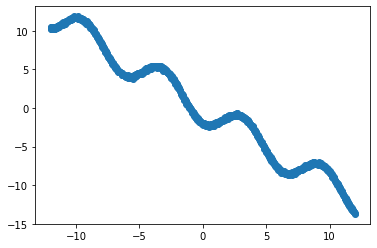

In [6]:
n=1000
X = np.linspace(-12, 12, num=n)
noise = np.random.normal(0, 0.1, n)
y = -(2*np.cos(X) + X) + noise 

plt.scatter(X, y)
plt.show()

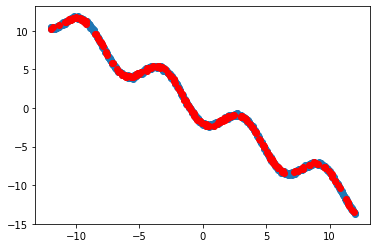

In [7]:
trainingSetSize = int(0.8*n)
trainIdxs = np.random.choice(n, trainingSetSize, replace=False)
valIdxs = np.array(list(set(np.arange(n)) - set(trainIdxs)))

train_X, train_y = X[trainIdxs][:,None], y[trainIdxs][:,None]
val_X, val_y = X[valIdxs][:,None], y[valIdxs][:,None]
plt.scatter(train_X, train_y)
plt.scatter(val_X, val_y, color="red")
plt.show()

Epoch 0: Loss 0.94
Epoch 1: Loss 0.857
Epoch 2: Loss 0.826
Epoch 3: Loss 0.832
Epoch 4: Loss 0.777
Epoch 5: Loss 0.767
Epoch 6: Loss 0.741
Epoch 7: Loss 0.718
Epoch 8: Loss 0.726
Epoch 9: Loss 0.73
Epoch 10: Loss 0.693
Epoch 11: Loss 0.677
Epoch 12: Loss 0.666
Epoch 13: Loss 0.663
Epoch 14: Loss 0.651
Epoch 15: Loss 0.663
Epoch 16: Loss 0.715
Epoch 17: Loss 0.731
Epoch 18: Loss 0.641
Epoch 19: Loss 0.621
Epoch 20: Loss 0.628
Epoch 21: Loss 0.61
Epoch 22: Loss 0.61
Epoch 23: Loss 0.627
Epoch 24: Loss 0.645
Epoch 25: Loss 0.617
Epoch 26: Loss 0.658
Epoch 27: Loss 0.58
Epoch 28: Loss 0.59
Epoch 29: Loss 0.588
Epoch 30: Loss 0.598
Epoch 31: Loss 0.632
Epoch 32: Loss 0.577
Epoch 33: Loss 0.579
Epoch 34: Loss 0.57
Epoch 35: Loss 0.573
Epoch 36: Loss 0.547
Epoch 37: Loss 0.562
Epoch 38: Loss 0.551
Epoch 39: Loss 0.593
Epoch 40: Loss 0.581
Epoch 41: Loss 0.562
Epoch 42: Loss 0.554
Epoch 43: Loss 0.552
Epoch 44: Loss 0.536
Epoch 45: Loss 0.542
Epoch 46: Loss 0.512
Epoch 47: Loss 0.518
Epoch 48:

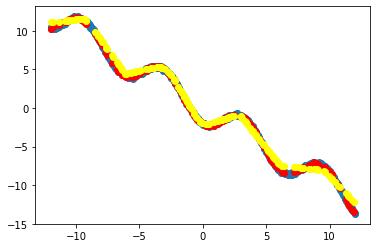

In [10]:
model = NeuralNetwork(size=[1, 50, 50, 1],
                      activation=[ReLU6(), ReLU6(), Linear()],
                      loss=Quadratic(),
                      regression=True)

model.SGD(train_X, train_y, val_X, val_y, epochs=500, batch_percent=0.05, eta=0.001, lmbda=0.5, verbose=True)
modelY = model.feedforward(val_X)

plt.scatter(train_X, train_y)
plt.scatter(val_X, val_y, color="red")
plt.scatter(val_X, modelY, color="yellow")
plt.show()